# BLSTM~ FRENCH

***1. IMPORT LIBRARIES***

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from nltk import word_tokenize

***2. LOAD THE FRENCH DATASET***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#LOAD THREE DATASETS
data=pd.read_csv('/content/drive/MyDrive/thesiss/French.csv')

In [ ]:
data.drop(['Unnamed: 0','clean_with_stopwords','text'], axis=1, inplace=True) # remove unnecessary columns

In [ ]:
data.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
data

,Fake,text,clean_with_stopwords,final_clean
0,0,Il tente d'incendier sa femme : elle est indem...,il tente de incendier son femme lui être indem...,tente incendier femme indemne gravement bruler...
1,0,"Ça y est, Renaud a fait son retour sur scène !...",cela y être renaud avoir faire son retour sur ...,etre renaud avoir faire retour scene octobre a...
2,0,"Avec son tailleur rouge, quel message a voulu ...",avec son tailleur rouge quel message avoir vou...,tailleur rouge message avoir vouloir envoyer h...
3,0,Foot-Ligue 1 : tous les résultats de la 8ème j...,foot ligue tout le résultat de le èm journée h...,foot ligue tout resultat eme journee octobre m...
4,0,× S'abonner au podcast \nVous pouvez vous abon...,se abonner au podcast vous pouvoir vous abonne...,abonner podcast pouvoir abonner telechargement...
...,...,...,...,...
27811,1,97% de Libanaises refaites : L’ONU demande au ...,pourcent de libanais refaire l onu demande au ...,pourcent libanais refaire onu demande liban ar...
27812,1,Un réfugié syrien humilie et empêche une famil...,un réfugié syrien humilier et empêche un famil...,refugier syrien humilier empeche famill rom tr...
27813,1,Mehdi Meklat lance une banane à Christiane Tau...,mehdi meklat lance un banane à christiane taub...,mehdi meklat lance banane christiane taubira a...
27814,1,"En visite en Afghanistan, Marine Le Pen refuse...",en visite en afghanistan marine le pen refuse ...,visite afghanistan marine pen refuse participe...


In [ ]:
data['final_clean'].isnull().sum() # Check any missing entries in each column

0

In [ ]:
data

,Fake,text,clean_with_stopwords,final_clean
0,0,Il tente d'incendier sa femme : elle est indem...,il tente de incendier son femme lui être indem...,tente incendier femme indemne gravement bruler...
1,0,"Ça y est, Renaud a fait son retour sur scène !...",cela y être renaud avoir faire son retour sur ...,etre renaud avoir faire retour scene octobre a...
2,0,"Avec son tailleur rouge, quel message a voulu ...",avec son tailleur rouge quel message avoir vou...,tailleur rouge message avoir vouloir envoyer h...
3,0,Foot-Ligue 1 : tous les résultats de la 8ème j...,foot ligue tout le résultat de le èm journée h...,foot ligue tout resultat eme journee octobre m...
4,0,× S'abonner au podcast \nVous pouvez vous abon...,se abonner au podcast vous pouvoir vous abonne...,abonner podcast pouvoir abonner telechargement...
...,...,...,...,...
27811,1,97% de Libanaises refaites : L’ONU demande au ...,pourcent de libanais refaire l onu demande au ...,pourcent libanais refaire onu demande liban ar...
27812,1,Un réfugié syrien humilie et empêche une famil...,un réfugié syrien humilier et empêche un famil...,refugier syrien humilier empeche famill rom tr...
27813,1,Mehdi Meklat lance une banane à Christiane Tau...,mehdi meklat lance un banane à christiane taub...,mehdi meklat lance banane christiane taubira a...
27814,1,"En visite en Afghanistan, Marine Le Pen refuse...",en visite en afghanistan marine le pen refuse ...,visite afghanistan marine pen refuse participe...


In [ ]:
data['Fake'].value_counts()

1    14487
0    13329
Name: Fake, dtype: int64

***3. TOKENIZATION***

In [ ]:
import nltk  # don't forget to do this step everytime in colab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['Text_tokenised'] = data['final_clean'].apply(word_tokenize)

***4. CREATE OWN WORD EMBEDDINGS***

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# gensim needs a list of lists

source_list= []
for row in data['Text_tokenised']:
    source_list.append(row)

**Set parameters**

In [ ]:
model = Word2Vec(source_list, size=300, window=2, sg=0, hs =1, sorted_vocab= 1)
# summarize the loaded model
print(model)

# 300 dimensions

# sg = Training algorithm: 1 for skip-gram

# hs = 1, hierarchical softmax will be used for model training

# sorted_vocab = 1, sort the vocabulary by descending frequency before assigning word indexes

# window = 2 Maximum distance between the current and predicted word within a sentence.

Word2Vec(vocab=44308, size=300, alpha=0.025)


**Save model to .txt format**

In [ ]:
model.wv.save_word2vec_format('french_wv.txt', binary=False)  # binary=False turns it to a .bin

In [ ]:
# print the first few lines to check it out

a_file = open("french_wv.txt")
number_of_lines = 4

for i in range(number_of_lines):
    line = a_file.readline()
    print(line)

44308 300

avoir -0.29657978 0.3527891 0.10235209 -0.06194169 0.091226965 -0.021568377 -0.51731986 -0.12269894 0.20755795 -0.17134587 -0.08379506 -0.008982463 0.5698803 -0.16510291 -0.26666975 0.29724705 0.1881022 0.4824888 0.52745444 -0.027654456 0.10833298 0.15087035 0.15873988 -0.09100141 -0.24579485 -0.039367307 -0.04797955 -0.34832877 -0.21790884 0.3966487 0.19578685 0.2056078 0.03560023 -0.38573435 0.85376585 -0.12974508 0.53759915 -0.26735038 -0.2431697 -0.24936228 -0.12813532 -0.051561564 0.5793172 -0.4618812 0.3821239 0.4256923 0.32112616 -0.014457009 -0.13757382 0.15773246 -0.092976786 -0.082414255 -0.22271979 -0.091069825 0.25857195 0.5324056 -0.3514839 -0.40846452 -0.1905479 -0.22297135 -0.15913036 0.121913366 0.13417158 -0.19624214 0.24000806 0.0650748 -0.08067252 0.149424 -0.41498426 0.0030621237 -0.018622436 -0.08901205 -0.2206616 -0.41751733 0.013404987 0.284778 0.23559019 0.16248995 0.43020785 0.03357341 0.1018288 -0.32727978 -0.14606105 0.3832378 0.15149596 0.02576138

**Create a dictionary**

In [ ]:
docs = data.final_clean.values
labels = data.Fake.values

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
from keras.layers import Activation

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1  # I add one because it starts counting from 0

In [ ]:
import itertools
# see a slice of our dictionary
dict(itertools.islice(t.word_index.items(), 10))

{'aller': 10,
 'apres': 9,
 'avoir': 1,
 'comme': 7,
 'etre': 2,
 'faire': 4,
 'plus': 3,
 'pouvoir': 6,
 'premier': 8,
 'tout': 5}

***5. SPLIT THE DATA***

In [ ]:
# divide the data into train/validate

from sklearn.model_selection import train_test_split


sentences_train, sentences_valid, y_train, y_valid = train_test_split(
    docs, labels, test_size=0.20, random_state=1000)

***6. USE KERAS TOKENIZER TO CONVERT TRAIN AND VALID TO SEQUENCES***

In [ ]:
X_train = t.texts_to_sequences(sentences_train)
X_valid = t.texts_to_sequences(sentences_valid)


print(sentences_train[2])
print(X_train[2])

jessica leeds ancien femme affaire lieu avion date debut anner accusation comme pieuvr mains partout source new york time rachel crook trentain receptionniste epoque lieu sortie ascenseur trump tower new york date accusation apres avoir simplement faire connaissance echanger poigne main avoir embrasser directement bouche source new york time jill harth travailler concours beaute lieu mar avoir lago domaine trump florid date janvier accusation admirer decoration seul chose souvenir ensuite etre pousse contre mur mettre main partout moi source new york time mindy mcgillivray assistant photograph lieu mar avoir lago domaine trump florid date janvier accusation etre plutot pelotage appuye plus simple attouchement etre tres pres centre fesse etre abasourdir source palm beach post natasha stoynoff collaborer magazine peopl lieu mar avoir lago domaine trump florid date decembre accusation trump avoir fermer porte derriere nous retourner espace quelque seconde train plaquer contre mur enfoncer

***7. POST-PADDING***

**Obtain the maximum length of each text**

In [ ]:
data['length'] = data['Text_tokenised'].str.len()

In [ ]:
maxlen = data['length'].max()

In [ ]:
maxlen

3521

**Pad short sequences**

In [ ]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_valid = pad_sequences(X_valid, padding='post', maxlen=maxlen)

print(X_train[1, :])

[16082 16244   344 ...     0     0     0]


***8. LOAD THE WHOLE EMBEDDING INTO MEMORY***

In [ ]:
embeddings_index = dict()
f = open('french_wv.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 44309 word vectors.


***9. CREATE A WEIGHT MATRIX FOR WORDS IN TRAINING ARTICLES***

In [ ]:
embedding_matrix = zeros((vocab_size, 300))  # create an empty numpy array which will be used as the embedding layer in our model with my dimensions 50 here
for word, i in t.word_index.items():  # go through our vocab integers and words
	embedding_vector = embeddings_index.get(word)  # find the word in the pretrained word vectors
	if embedding_vector is not None:  # if it is  not empty put it in our embedding matrix
		embedding_matrix[i] = embedding_vector


***10. BUILD THE MODEL***

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam,SGD

model=Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Bidirectional(LSTM(100)))  # one BLSTM Layer with 100 neurons 
model.add(Dropout(0.3)) # DROPOUT LAYER
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam=Adam(learning_rate=0.001)
model.compile(adam, loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3521, 300)         40375800  
                                                                 
 bidirectional (Bidirectiona  (None, 200)              320800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 40,703,065
Trainable params: 327,265
Non-trainable params: 40,375,800
______________________________________

***11. TRAIN THE MODEL***

In [ ]:
# fit the model on the whole data
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_valid, y_valid),
                    batch_size=128)

Epoch 1/10
174/174 [==============================] - 96s 517ms/step - loss: 0.3611 - accuracy: 0.8452 - val_loss: 0.2536 - val_accuracy: 0.9047
Epoch 2/10
174/174 [==============================] - 89s 511ms/step - loss: 0.2274 - accuracy: 0.9143 - val_loss: 0.1861 - val_accuracy: 0.9290
Epoch 3/10
174/174 [==============================] - 89s 514ms/step - loss: 0.1656 - accuracy: 0.9390 - val_loss: 0.1614 - val_accuracy: 0.9333
Epoch 4/10
174/174 [==============================] - 89s 514ms/step - loss: 0.1308 - accuracy: 0.9520 - val_loss: 0.1447 - val_accuracy: 0.9441
Epoch 5/10
174/174 [==============================] - 90s 517ms/step - loss: 0.0995 - accuracy: 0.9652 - val_loss: 0.1318 - val_accuracy: 0.9502
Epoch 6/10
174/174 [==============================] - 90s 517ms/step - loss: 0.0738 - accuracy: 0.9739 - val_loss: 0.1176 - val_accuracy: 0.9561
Epoch 7/10
174/174 [==============================] - 90s 517ms/step - loss: 0.0545 - accuracy: 0.9814 - val_loss: 0.1256 - val_ac

***12. GRAPHIC ILLUSTRATION***

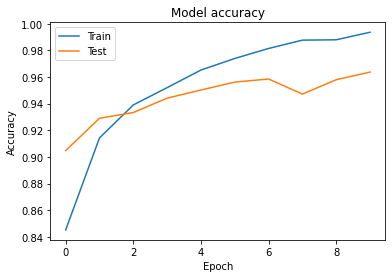

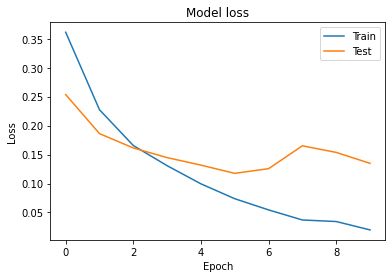

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

***13. METRICS***

In [ ]:
y_pred_valid=(model.predict(X_valid)>0.5).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_valid,y_pred_valid))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2637
           1       0.96      0.97      0.97      2927

    accuracy                           0.96      5564
   macro avg       0.96      0.96      0.96      5564
weighted avg       0.96      0.96      0.96      5564



***14. SAVE THE MODEL***

In [ ]:
model.save('model_fr.h5')

In [ ]:
model3=load_model('model_fr.h5')